# Data Story Assignment

## Instructions

Exercise Steps
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call.

In your quest, you might need to ask a bunch of other questions, such as:
 * Can I count something interesting?
 * Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
 * Can I make a bar plot or a histogram?
 * Can I compare two related quantities?
 * Can I make a scatterplot?
 * Can I make a time-series plot?
 * Looking at the plots, what are some insights I can make?
 * Can I see any correlations?
 * Is there a hypothesis I can - and should - investigate further?
 * What other questions are the insights leading me to ask?
 
Submission: Submit links to a GitHub repository containing a Jupyter Notebook or a
PowerPoint. The file should contain:
 * The questions you asked
 * The trends you investigated
 * The resulting visualizations and conclusions 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

Using this dataset on daily power generation in India by region/generation type:

https://www.kaggle.com/navinmundhra/daily-power-generation-in-india-20172020/discussion

In [9]:
energy = pd.read_csv('Power_Generation_India_Kaggle/file_02.csv', index_col='index')

In [10]:
energy.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
index,,,,,,,,
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [7]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


Why so many nulls for nuclear? It's because those regions don't have any nuclear power plants. We can convert the NaNs to 0s.

https://www.jagranjosh.com/general-knowledge/list-of-nuclear-power-plants-in-india-1503388974-1

In [23]:
# replace NaNs with 0s
energy = energy.replace(np.nan, 0)

#remove commas so columns can become floats
energy = energy.replace(',','', regex=True)

In [28]:
# simplify column names and swap actual with estimated (per kaggle discussion the are labelled incorrectly)
rename_dict = {
    'Thermal Generation Actual (in MU)':'thermal_est',
    'Thermal Generation Estimated (in MU)':'thermal',
    'Nuclear Generation Actual (in MU)':'nuclear_est',
    'Nuclear Generation Estimated (in MU)':'nuclear',
    'Hydro Generation Actual (in MU)':'hydro_est',
    'Hydro Generation Estimated (in MU)':'hydro'
}

energy = energy.rename(columns=rename_dict)

In [36]:
#convert date strings to datetime objects
energy['Date'] = pd.to_datetime(energy['Date'])
energy.Date

index
0     2017-09-01
1     2017-09-01
2     2017-09-01
3     2017-09-01
4     2017-09-01
         ...    
305   2020-08-01
306   2020-08-01
307   2020-08-01
308   2020-08-01
309   2020-08-01
Name: Date, Length: 4945, dtype: datetime64[ns]

In [37]:
energy.describe()

,thermal_est,thermal,nuclear_est,nuclear,hydro_est,hydro
count,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000
mean,603.978358,575.395116,22.345325,22.192726,73.305921,76.842965
std,383.534208,383.387299,22.006882,20.189857,74.482145,82.043952
min,12.340000,12.380000,0.000000,0.000000,0.000000,0.000000
25%,470.050000,427.460000,0.000000,0.000000,26.910000,23.310000
50%,615.280000,535.980000,25.130000,28.460000,52.960000,50.270000
75%,689.530000,672.740000,34.020000,36.600000,85.940000,95.800000
max,1395.970000,1442.380000,68.740000,76.640000,348.720000,397.380000


In [38]:
energy.Region.unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

In [44]:
# drop estimate columns (confine  analysis to actual reported numbers)
energy = energy.drop(columns=['thermal_est','nuclear_est','hydro_est'])

In [62]:
# looks like there's a large gap in records during 2020 and in late 2017 so we'll confine analysis to 2018 and 2019

energy = energy[(energy.Date.dt.year == 2018) | (energy.Date.dt.year == 2019)]

## Analysis

Some initial questions we can explore:
 * Change in generation over time by region
 * Change in generation over time by type
 * Proportion of type by region
 * Change in proportion of type by region over time
 * seasonal trends by nation and by state

In [63]:
# create df with national totals
energy_national = energy.drop(columns=['Region']).groupby('Date').sum()

In [64]:
energy_national.head()

,thermal,nuclear,hydro
Date,,,
2018-01-01,2805.89,131.03,202.76
2018-01-02,2876.93,134.29,211.84
2018-01-03,2921.50,134.40,212.67
2018-01-04,2948.01,133.01,218.64
2018-01-05,2974.19,134.87,215.91


In [114]:
energy_national['year'] = energy_national.index.year
totals_by_year = energy_national.groupby('year').sum()
totals_by_year.reset_index(inplace=True)
totals_by_year_melt = pd.melt(totals_by_year, id_vars='year')
totals_by_year

,year,thermal,nuclear,hydro
0,2018,1068919.22,37607.29,130575.03
1,2019,1043963.10,43580.46,153163.83


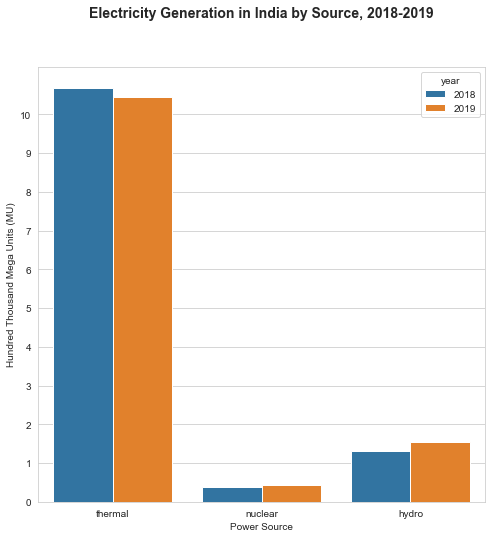

In [132]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (8,8))

sns.barplot(data=totals_by_year_melt, x='variable', y='value', hue='year', orient='v')

ax.set_title('Electricity Generation in India by Source, 2018-2019', fontsize=14, weight='bold', y=1.1)
ax.set_ylabel('Hundred Thousand Mega Units (MU)')
ax.set_xlabel('Power Source')

ax.set_yticks(np.arange(0,1100000, 100000))
ax.set_yticklabels(np.arange(0,11,1))

plt.show()

In [133]:
totals_by_year['total'] = totals_by_year.nuclear + totals_by_year.hydro + totals_by_year.thermal
totals_by_year

,year,thermal,nuclear,hydro,total,thermal_pcnt,nuclear_pcnt,hydro_pcnt
0,2018,1068919.22,37607.29,130575.03,1237101.54,86.4,3.0,10.6
1,2019,1043963.10,43580.46,153163.83,1240707.39,84.1,3.5,12.3


In [142]:
#groupby region (2019 only)
energy_by_region = energy[energy.Date.dt.year == 2019].groupby('Region').sum().reset_index()
energy_by_region

,Region,thermal,nuclear,hydro,total
0,Eastern,173172.22,0.00,20677.15,193849.37
1,NorthEastern,13206.28,0.00,4765.03,17971.31
2,Northern,217361.84,11730.29,80405.00,309497.13
3,Southern,198626.41,17735.02,30591.68,246953.11
4,Western,441596.35,14115.15,16724.97,472436.47


In [148]:
by_region_melt

,Region,variable,value
0,Eastern,thermal,173172.22
1,NorthEastern,thermal,13206.28
2,Northern,thermal,217361.84
3,Southern,thermal,198626.41
4,Western,thermal,441596.35
5,Eastern,nuclear,0.00
6,NorthEastern,nuclear,0.00
7,Northern,nuclear,11730.29
8,Southern,nuclear,17735.02
9,Western,nuclear,14115.15


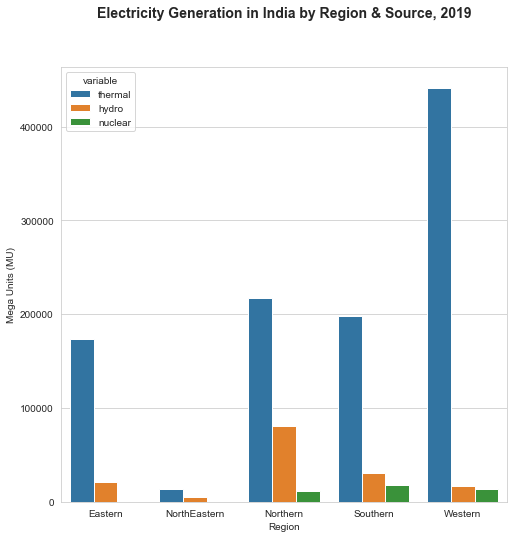

In [157]:
by_region_melt = pd.melt(energy_by_region, id_vars='Region')

fig, ax = plt.subplots(figsize = (8,8))

hue_order=['thermal','hydro','nuclear']

sns.barplot(data=by_region_melt[by_region_melt.variable != 'total'], x='Region', y='value',
            hue_order=hue_order, hue='variable', orient='v')

ax.set_title('Electricity Generation in India by Region & Source, 2019', fontsize=14, weight='bold', y=1.1)
ax.set_ylabel('Mega Units (MU)')
ax.set_xlabel('Region')

#ax.set_yticks(np.arange(0,1100000, 100000))
#ax.set_yticklabels(np.arange(0,11,1))

plt.show()

**Observations:**
 * Proportions are close between the two years
 * 2019 saw a bit more hydro and less thermal
 * Thermal makes up the majority of generation both years

,thermal,nuclear,hydro,year
Date,,,,
2018-01-01,2805.89,131.03,202.76,2018
2018-01-02,2876.93,134.29,211.84,2018
2018-01-03,2921.50,134.40,212.67,2018
2018-01-04,2948.01,133.01,218.64,2018
2018-01-05,2974.19,134.87,215.91,2018
...,...,...,...,...
2019-12-27,2969.16,113.76,271.61,2019
2019-12-28,2918.34,113.74,258.08,2019
2019-12-29,2831.34,113.72,265.44,2019


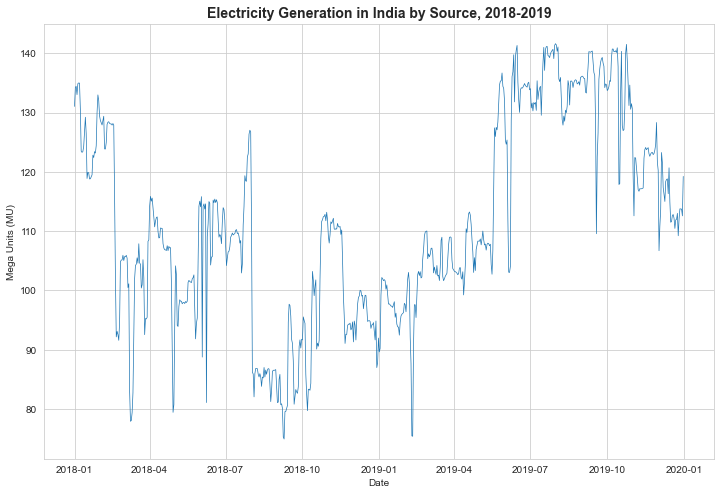

In [201]:
#plot timeseries
energy_national['total'] = energy_national.thermal + energy_national.hydro + energy_national.nuclear
fig, ax = plt.subplots(ncols=1, figsize=(12, 8))
sns.lineplot(data=energy_national, x='Date', y='nuclear', linewidth=0.7)
#labels
ax.set_title('Electricity Generation in India by Source, 2018-2019', weight='bold', fontsize=14)
ax.set_ylabel('Mega Units (MU)')

#x axis
#ax.set_yticks(range(0,4000, 500))
plt.show()

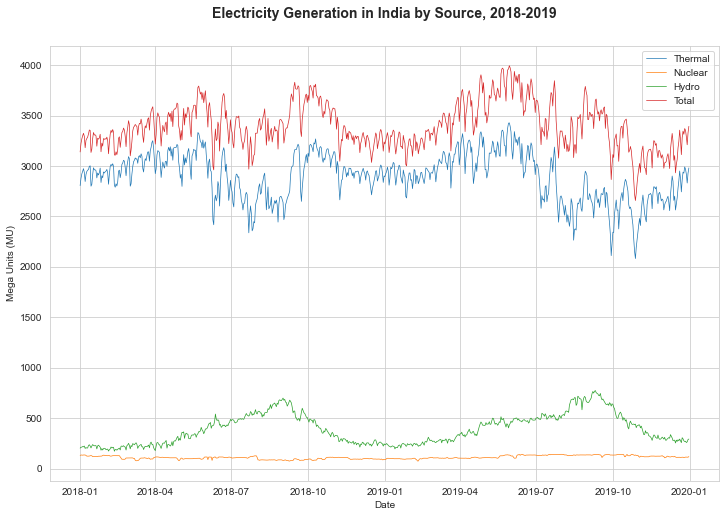

In [187]:
#plot timeseries
fig, ax = plt.subplots(ncols=1, figsize=(12, 8))
sns.lineplot(data=energy_national, x='Date', y='thermal', linewidth=0.7)
sns.lineplot(data=energy_national, x='Date', y='nuclear', linewidth=0.7)
sns.lineplot(data=energy_national, x='Date', y='hydro', linewidth=0.7)
sns.lineplot(data=energy_national, x='Date', y='total', linewidth=0.7)

#labels
ax.set_title('Electricity Generation in India by Source, 2018-2019', weight='bold', fontsize=14, y=1.05)
ax.legend(['Thermal','Nuclear','Hydro','Total'])
ax.set_ylabel('Mega Units (MU)')

plt.show()

**Observations:**
 * There is an obvious seasonal cycle. More hydro power during monsoon season which is June-September
 * When there is more hydro power, the thermal plants reduce output to compensate
 * Nuclear plants can't adjust output so they are constant

In [123]:
energy['total'] = energy.thermal + energy.nuclear + energy.hydro

In [124]:
energy

,Date,Region,thermal,nuclear,hydro,total
index,,,,,,
605,2018-01-01,Northern,625.16,32.09,110.00,767.25
606,2018-01-01,Western,1152.31,26.14,19.88,1198.33
607,2018-01-01,Southern,556.72,72.80,42.45,671.97
608,2018-01-01,Eastern,435.94,0.00,21.87,457.81
609,2018-01-01,NorthEastern,35.76,0.00,8.56,44.32
...,...,...,...,...,...,...
4245,2019-12-31,Northern,597.52,36.71,114.53,748.76
4246,2019-12-31,Western,1315.80,37.23,39.99,1393.02
4247,2019-12-31,Southern,546.81,45.29,99.97,692.07


In [184]:
energy

,Date,Region,thermal,nuclear,hydro,total
index,,,,,,
605,2018-01-01,Northern,625.16,32.09,110.00,767.25
606,2018-01-01,Western,1152.31,26.14,19.88,1198.33
607,2018-01-01,Southern,556.72,72.80,42.45,671.97
608,2018-01-01,Eastern,435.94,0.00,21.87,457.81
609,2018-01-01,NorthEastern,35.76,0.00,8.56,44.32
...,...,...,...,...,...,...
4245,2019-12-31,Northern,597.52,36.71,114.53,748.76
4246,2019-12-31,Western,1315.80,37.23,39.99,1393.02
4247,2019-12-31,Southern,546.81,45.29,99.97,692.07


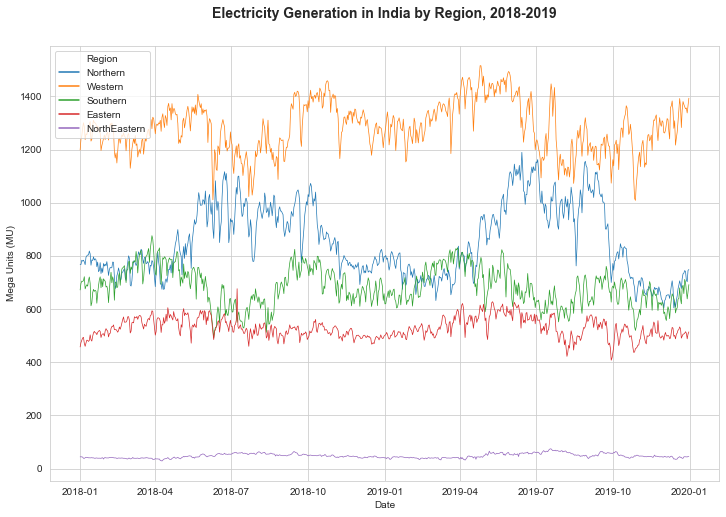

In [188]:
#plot timeseries
fig, ax = plt.subplots(ncols=1, figsize=(12, 8))

sns.lineplot(data=energy, x='Date', y='total', linewidth=0.7, hue='Region')

#labels
ax.set_title('Electricity Generation in India by Region, 2018-2019', weight='bold', fontsize=14, y=1.05)
#ax.legend(['Thermal','Nuclear','Hydro','Total'])
ax.set_ylabel('Mega Units (MU)')

plt.show()

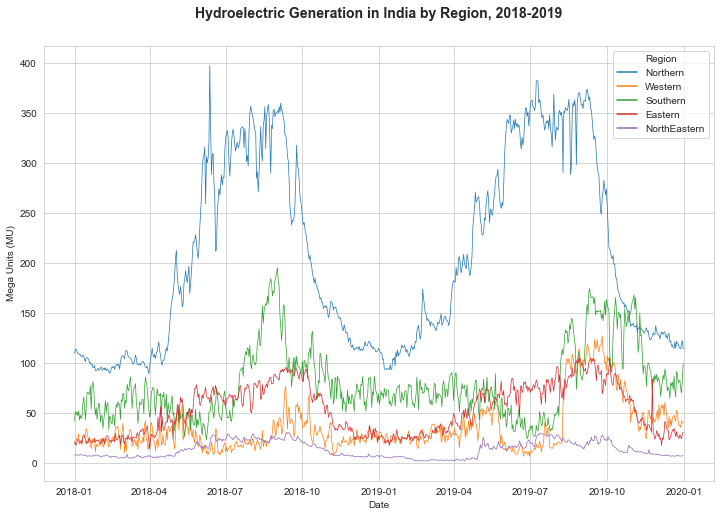

In [232]:
#plot timeseries
fig, ax = plt.subplots(ncols=1, figsize=(12, 8))

sns.lineplot(data=energy, x='Date', y='hydro', linewidth=0.7, hue='Region')

#labels
ax.set_title('Hydroelectric Generation in India by Region, 2018-2019', weight='bold', fontsize=14, y=1.05)
#ax.legend(['Thermal','Nuclear','Hydro','Total'])
ax.set_ylabel('Mega Units (MU)')

plt.show()

In [228]:
energy

,Date,Region,thermal,nuclear,hydro,total
index,,,,,,
605,2018-01-01,Northern,625.16,32.09,110.00,767.25
606,2018-01-01,Western,1152.31,26.14,19.88,1198.33
607,2018-01-01,Southern,556.72,72.80,42.45,671.97
608,2018-01-01,Eastern,435.94,0.00,21.87,457.81
609,2018-01-01,NorthEastern,35.76,0.00,8.56,44.32
...,...,...,...,...,...,...
4245,2019-12-31,Northern,597.52,36.71,114.53,748.76
4246,2019-12-31,Western,1315.80,37.23,39.99,1393.02
4247,2019-12-31,Southern,546.81,45.29,99.97,692.07


In [229]:
energy_melt = pd.melt(energy[energy.Date.dt.year == 2019].drop(columns=['Date']), id_vars='Region')

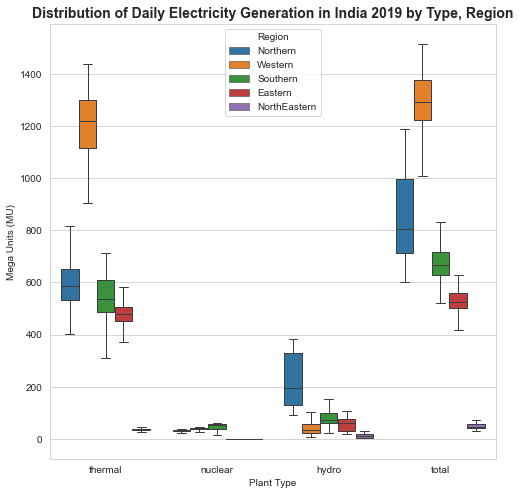

In [231]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=energy_melt, x='variable', y='value', hue='Region', showfliers=False, linewidth=1)
ax.set_title('Distribution of Daily Electricity Generation in India 2019 by Type, Region',fontsize=14, weight='bold')
ax.set_ylabel('Mega Units (MU)')
ax.set_xlabel('Plant Type');

In [220]:
energy_melt

,Region,variable,value
0,Northern,thermal,625.16
1,Western,thermal,1152.31
2,Southern,thermal,556.72
3,Eastern,thermal,435.94
4,NorthEastern,thermal,35.76
...,...,...,...
14575,Northern,total,748.76
14576,Western,total,1393.02
14577,Southern,total,692.07
14578,Eastern,total,514.41


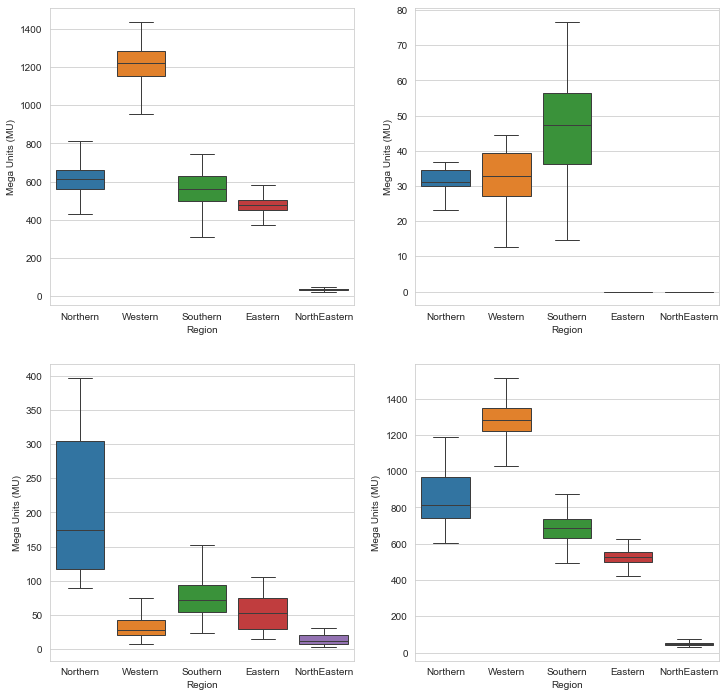

In [224]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12,12))
sns.boxplot(data=energy_melt[energy_melt.variable=='thermal'], x='Region', y='value', showfliers=False, linewidth=1, ax=ax1)
sns.boxplot(data=energy_melt[energy_melt.variable=='nuclear'], x='Region', y='value', showfliers=False, linewidth=1, ax=ax2)
sns.boxplot(data=energy_melt[energy_melt.variable=='hydro'], x='Region', y='value', showfliers=False, linewidth=1, ax=ax3)
sns.boxplot(data=energy_melt[energy_melt.variable=='total'], x='Region', y='value', showfliers=False, linewidth=1, ax=ax4)

#fig.set_title('Distribution of Daily Electricity Generation in India 2018-2019 by Type, Region',fontsize=14, weight='bold')
ax1.set_ylabel('Mega Units (MU)')
ax2.set_ylabel('Mega Units (MU)')
ax3.set_ylabel('Mega Units (MU)')
ax4.set_ylabel('Mega Units (MU)');

In [191]:
energy_national

,thermal,nuclear,hydro,year,total
Date,,,,,
2018-01-01,2805.89,131.03,202.76,2018,3139.68
2018-01-02,2876.93,134.29,211.84,2018,3223.06
2018-01-03,2921.50,134.40,212.67,2018,3268.57
2018-01-04,2948.01,133.01,218.64,2018,3299.66
2018-01-05,2974.19,134.87,215.91,2018,3324.97
...,...,...,...,...,...
2019-12-27,2969.16,113.76,271.61,2019,3354.53
2019-12-28,2918.34,113.74,258.08,2019,3290.16
2019-12-29,2831.34,113.72,265.44,2019,3210.50


In [193]:
#check correlation between hydro and thermal
correlation = energy_national['thermal'].corr(energy_national['hydro'])
correlation

-0.3752844125139978

In [195]:
correlation = energy_national['hydro'].corr(energy_national['nuclear'])
correlation

0.26414825889786536

In [203]:
energy_national

,thermal,nuclear,hydro,year,total
Date,,,,,
2018-01-01,2805.89,131.03,202.76,2018,3139.68
2018-01-02,2876.93,134.29,211.84,2018,3223.06
2018-01-03,2921.50,134.40,212.67,2018,3268.57
2018-01-04,2948.01,133.01,218.64,2018,3299.66
2018-01-05,2974.19,134.87,215.91,2018,3324.97
...,...,...,...,...,...
2019-12-27,2969.16,113.76,271.61,2019,3354.53
2019-12-28,2918.34,113.74,258.08,2019,3290.16
2019-12-29,2831.34,113.72,265.44,2019,3210.50


Text(0.5, 1.0, 'Correlation between Generation Sources')

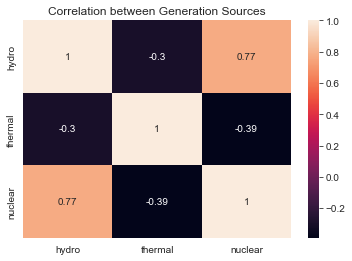

In [206]:
# Make a heatmap of the data
sns.heatmap(round(energy_national[energy_national.year == 2019][['hydro','thermal','nuclear']].corr(),2), annot=True)
plt.title('Correlation between Generation Sources')

In [242]:
energy_national

,thermal,nuclear,hydro,year,total
Date,,,,,
2018-01-01,2805.89,131.03,202.76,2018,3139.68
2018-01-02,2876.93,134.29,211.84,2018,3223.06
2018-01-03,2921.50,134.40,212.67,2018,3268.57
2018-01-04,2948.01,133.01,218.64,2018,3299.66
2018-01-05,2974.19,134.87,215.91,2018,3324.97
...,...,...,...,...,...
2019-12-27,2969.16,113.76,271.61,2019,3354.53
2019-12-28,2918.34,113.74,258.08,2019,3290.16
2019-12-29,2831.34,113.72,265.44,2019,3210.50


In [240]:
energy_region = energy[energy.Date.dt.year == 2019].drop(columns=['Date']).groupby('Region').sum()

<AxesSubplot:>

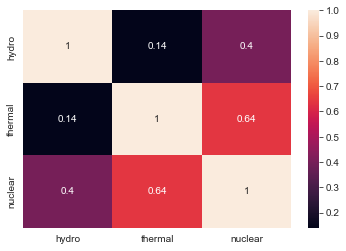

In [241]:
sns.heatmap(round(energy_region[['hydro','thermal','nuclear']].corr(),2), annot=True)